In [3]:
pip install mysql-connector-python

   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.4 MB 8.5 MB/s eta 0:00:02
   ------- -------------------------------- 3.1/16.4 MB 9.2 MB/s eta 0:00:02
   ------------- -------------------------- 5.5/16.4 MB 10.2 MB/s eta 0:00:02
   ------------------- -------------------- 8.1/16.4 MB 10.7 MB/s eta 0:00:01
   ------------------------- -------------- 10.5/16.4 MB 10.9 MB/s eta 0:00:01
   ------------------------------- -------- 12.8/16.4 MB 11.0 MB/s eta 0:00:01
   ------------------------------------- -- 15.5/16.4 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------- 16.4/16.4 MB 11.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importación de las bibliotecas que se usarán en esta actividad

import math # para operaciones Matemáticas
import numpy as np # para operaciones con matrices
import pandas as pd # para manejo de estructuras de datos -- dataframes
from datetime import datetime
import matplotlib.dates as mdates

# Herramientas para graficación
import matplotlib.pyplot as plt # Gráficas
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # Gráficas
import seaborn as sns # Gráficas
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('Solarize_Light2')
# Supresión de warnings
import warnings
warnings.filterwarnings('ignore')
import mysql.connector
from mysql.connector import Error
from datetime import datetime, timedelta

In [4]:
# Conexión a la Base de Datos de MySQL
try:
    connection2 = mysql.connector.connect(
          host='localhost',
        database='curso_sql',
     user='curso',
        password='Curso123*'
    )

    if connection2.is_connected():
        print('Conexión exitosa')

except Error as e:
    print(f'Error: {e}')

Conexión exitosa


In [12]:
query = 'SELECT hour(DiaHora1) AS hora, ROUND(AVG(FP_IND_III),3) AS FP_PROM FROM lecturasdia WHERE Edificio=1 AND Id_Sistema=2 GROUP BY hora ORDER BY hora;'
lecturasCalidad = pd.read_sql(query, connection2)

In [14]:
lecturasCalidad

,hora,FP_PROM
0,9,-0.977
1,10,-0.981
2,11,-0.980
3,12,-0.988
4,13,-0.995
5,14,-0.995
6,15,-0.994
7,16,-0.996
8,17,-0.995
9,18,-0.994


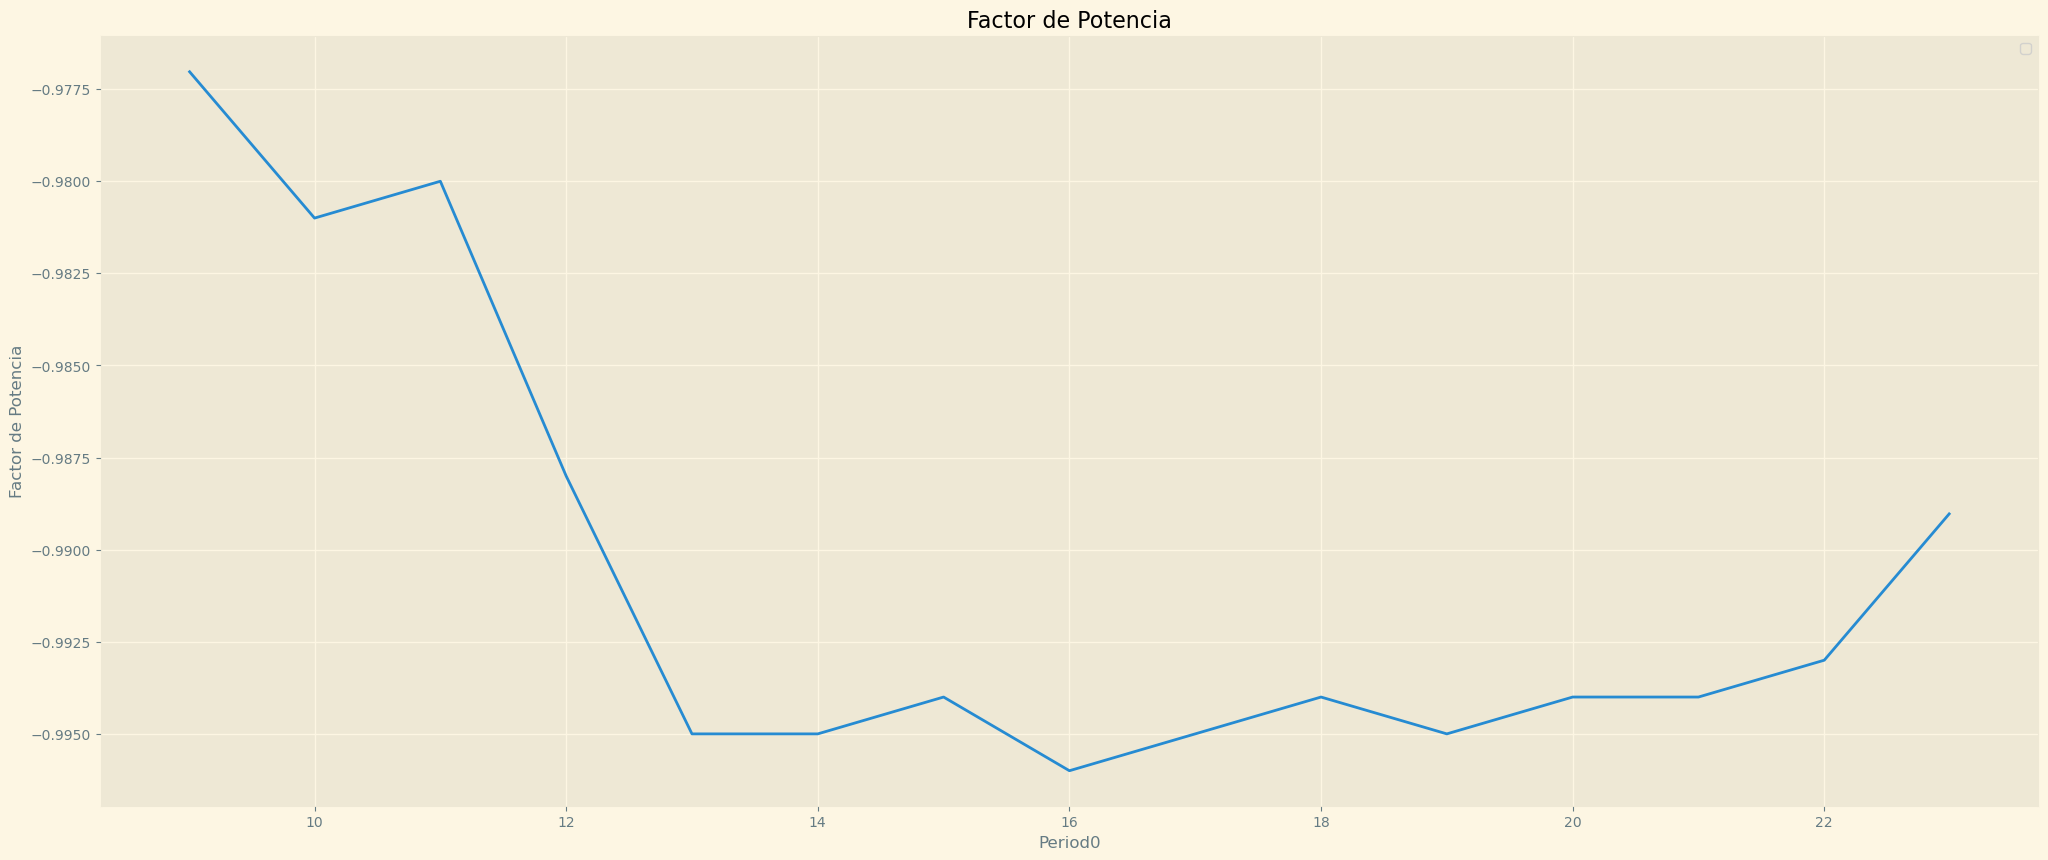

In [16]:
# Gráfica de línea
plt.title('Factor de Potencia')
#plt.axhline(y=0.95, xmin=0, xmax=1)
plt.ylabel('Factor de Potencia')
plt.xlabel('Period0')
plt.rcParams['figure.figsize'] = (25, 10)
sns.lineplot(x='hora',y='FP_PROM', data=lecturasCalidad)
plt.legend()
plt.show()